In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data=pd.read_csv(r"/content/creditcard.csv", on_bad_lines='skip')

<ipython-input-4-a4a85dba549d>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"/content/creditcard.csv", on_bad_lines='skip')


In [10]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
272838,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
272839,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
272840,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
272841,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0
272842,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0


In [12]:
fraud=data.loc[data['Class']==1]
normal=data.loc[data['Class']==0]

In [15]:
len(fraud)

421

In [16]:
len(normal)

272420

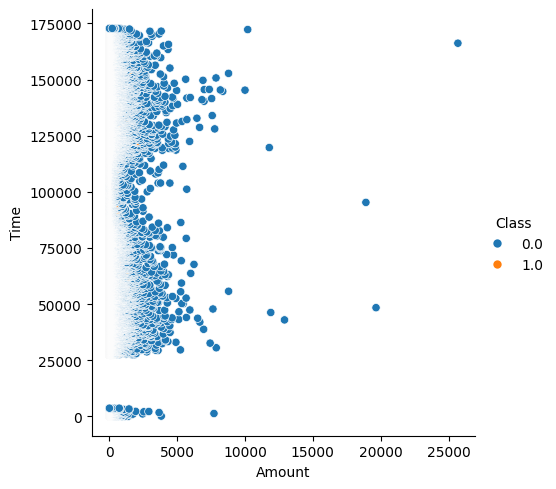

In [18]:
sns.relplot(x='Amount',y='Time',hue='Class',data=data)

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [23]:
X=data.iloc[:,:-1]
y=data['Class']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35)

In [29]:
clf=linear_model.LogisticRegression(C=1e5)

In [31]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


In [33]:
X_train.fillna(0, inplace=True)  # Or use another appropriate strategy
y_train.fillna(0, inplace=True)  # Same here


In [34]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [36]:
X_test.fillna(0, inplace=True)  # Or use another appropriate strategy
y_test.fillna(0, inplace=True)  # Same here


In [40]:
y_pred=np.array(clf.predict(X_test))
y=np.array(y_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [45]:
print(confusion_matrix(y_test,y_pred))

[[95340    23]
 [   31   102]]


In [46]:
print(accuracy_score(y_test,y_pred))

0.9994345312892686


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     95363
         1.0       0.82      0.77      0.79       133

    accuracy                           1.00     95496
   macro avg       0.91      0.88      0.90     95496
weighted avg       1.00      1.00      1.00     95496

